# Credit Risk Prediction for German Bank: Phase 1 - Data Preparation

*Submitted in partial fulfillment of the requirements for : Machine Learning (MATH2319) | Master of Analytics, RMIT University, Melbourne*
***

<p style="text-align:center;">
    <img src="images/data_processing.gif" alt="data-preprocessing" title="Data Preparation" width="500"><br>
    <center><i>Data Cleaning and Preprocessing <a id="ref1" href=#1>[1]</a></i></center>
</p>

# Table of Contents

* [Introduction](#Introduction)
    * [Dataset Source](#Dataset-Source)
    * [Dataset Details](#Dataset-Details)
    * [Dataset Features](#Dataset-Features)
    * [Target Feature](#Target-Feature)
* [Goals & Objectives](#Goals-&-Objectives)
* [Data Cleaning & Preprocessing](#Data-Cleaning-&-Preprocessing)
    * [Fixing Column Names](#Fixing-Column-Names)
    * [Check for Irrelevant Features](#Check-for-Irrelevant-Features)
    * [Check for Missing Values](#Check-for-Missing-Values)
    * [Discretizing Numeric Features](#Discretizing-Numeric-Features)
    * [Integer-Encoding Ordinal Categorical Features](#Integer-Encoding-Ordinal-Categorical-Features)
    * [One-Hot-Encoding Nominal Categorical Features](#One-Hot-Encoding-Nominal-Categorical-Features)
    * [Encoding Target Feature](#Encoding-Target-Feature)
    * [Scaling Descriptive Features](#Scaling-Descriptive-Features)
* [Data Exploration & Visualization](#Data-Exploration-&-Visualization)
    * [Summary Statistics](#Summary-Statistics)
    * [Univariate Plots](#Univariate-Plots)
    * [Bivariate Plots](#Bivariate-Plots)
    * [Trivariate Plots](#Trivariate-Plots)
* [Summary & Conclusions](#Summary-&-Conclusions)
* [References](#References)

## Introduction

### Dataset Source

The South German Credit data set <a id="ref3" href=#3>[3]</a> is a publicly available dataset downloaded from the UCI Machine Learning Repository found at the following link:

https://archive.ics.uci.edu/ml/datasets/South+German+Credit+%28UPDATE%29

### Dataset Details

The South German Credit Card dataset (`SouthGermanCredit.asc`) contains 700 good and 300 bad credits (total 1000 loan applicants) between the years 1973 to 1975 with 20 predictor variables. This dataset classifies people described by a set of attributes as good or bad credit risks. This dataset provides a correction to the widely used Statlog German credit data set ([link](https://archive.ics.uci.edu/ml/datasets/statlog+(german+credit+data))) which, as of November 2019, suffers from severe errors in the coding information and does not come with any background information. Here, some background information has been added (see [codetable](./data/SouthGermanCredit/codetable.txt)) based on the Open Data LMU (2010) <a id="ref5" href=#5>[5]</a> representation of the same data and several other German language resources.

### Dataset Features

* Number of instances (observations): 1000
* Number of descriptive features (explanatory attributes/predictor variables): 20


Name of Feature | English Name | Data Type | Units | Brief Description
:--- | :--- | :--- | :--- | :---
**`laufkont`** | **`status`** | Ordinal | DM | Status of the debtor's checking account with the bank<ul><li>1 : no checking account</li><li>2 : ... < 0 DM</li><li>3 : 0<= ... < 200 DM</li><li>4 : ... >= 200 DM / salary for at least 1 year
**`laufzeit`** | **`duration`** | Numerical | Months | Credit duration
**`moral`** | **`credit_history`** | Nominal | N/A | History of compliance with previous or concurrent credit contracts<ul><li>0 : delay in paying off in the past</li><li>1 : critical account/other credits elsewhere</li><li>2 : no credits taken/all credits paid back duly</li><li>3 : existing credits paid back duly till now</li><li>4 : all credits at this bank paid back duly</li></ul>
**`verw`** | **`purpose`** | Nominal | N/A | Purpose for which the credit is needed<ul><li>0 : others</li><li>1 : car (new)</li><li> 2 : car (used)</li><li> 3 : furniture/equipment</li><li>4 : radio/television</li><li>5 : domestic appliances</li><li>6 : repairs</li><li>7 : education</li><li>8 : vacation</li><li>9 : retraining</li><li>10 : business</li></ul>
**`hoehe`** | **`amount`** | Numerical | DM (Deutsche Mark) | Credit amount (result of monotonic transformation; actual data and type of transformation unknown)
**`sparkont`** | **`savings`** | Ordinal | DM | Debtor's savings<ul><li>1 : unknown/no savings account</li><li>2 : ... <  100 DM</li><li>3 : 100 <= ... <  500 DM</li><li>4 : 500 <= ... < 1000 DM</li><li>5 : ... >= 1000 DM</li></ul> 
**`beszeit`** | **`employment_duration`** | Ordinal;discretized numerical | Years | Duration of debtor's employment with current employer<ul><li>1 : unemployed</li><li>2 : < 1 yr</li><li>3 : 1 <= ... < 4 yrs</li><li>4 : 4 <= ... < 7 yrs</li><li>5 : >= 7 yrs</li></ul>   
**`rate`** | **`installment_rate`** | Ordinal;discretized numerical | % | Credit installments as a percentage of debtor's disposable income<ul><li>1 : >= 35</li><li>2 : 25 <= ... < 35</li><li>3 : 20 <= ... < 25</li><li>4 : < 20</li></ul>
**`famges`** | **`personal_status_sex`** | Nominal | N/A | Combined information on sex and marital status<ul><li>1 : male divorced/separated</li><li>2 : female non-single or male single</li><li>3 : male married/widowed</li><li>4 : female single</li></ul>   
**`buerge`** | **`other_debtors`** | Nominal | N/A | Existence of another debtor or a guarantor for the credit<ul><li>1 : none</li><li>2 : co-applicant</li><li>3 : guarantor</li></ul> 
**`wohnzeit`** | **`present_residence`** | Ordinal;discretized numerical | Years | Length of time the debtor lives in the present residence<ul><li>1 : < 1 yr</li><li>2 : 1 <= ... < 4 yrs</li><li>3 : 4 <= ... < 7 yrs</li><li>4 : >= 7 yrs</li></ul>    
**`verm`** | **`property`** | Nominal | N/A | Debtor's most valuable property, i.e. the highest possible code is used.<ul><li>1 : unknown / no property</li><li>2 : car or other</li><li>3 : building soc. savings agr./life insurance</li><li>4 : real estate</li></ul>
**`alter`** | **`age`** | Numerical | Years | Age of debtor
**`weitkred`** | **`other_installment_plans`** | Nominal | N/A | Installment plans from providers other than the credit-giving bank<ul><li>1 : bank</li><li>2 : stores</li><li>3 : none</li></ul>  
**`wohn`** | **`housing`** | Nominal | N/A | Type of housing the debtor lives in<ul><li>1 : for free</li><li>2 : rent</li><li>3 : own</li></ul>
**`bishkred`** | **`number_credits`** | Ordinal;discretized numerical | N/A | No. of credits including the current one the debtor has(or had) at this bank<ul><li>1 : 1</li><li>2 : 2-3</li><li>3 : 4-5</li><li>4 : >= 6</li></ul>
**`beruf`** | **`job`** | Ordinal | N/A | Quality of debtor's job<ul><li>1 : unemployed/unskilled - non-resident</li><li>2 : unskilled - resident</li><li>3 : skilled employee/official</li><li>4 : manager/self-employed/highly qualified employee</li></ul>
**`pers`** | **`people_liable`** | Binary; discretized numerical | N/A | No. of persons who financially depend on the debtor (i.e., are entitled to maintenance)<ul><li>1 : 3 or more</li><li>2 : 0 to 2</li></ul>
**`telef`** | **`telephone`** | Binary | N/A | Presence of a telephone land-line registered on the debtor's name (data is from 1970s)<ul><li>1 : no</li><li>2 : yes (under customer name)</li></ul>
**`gastarb`** | **`foreign_worker`** | Binary | N/A |  If the debtor is a foreign worker<ul><li>1 : yes</li><li>2 : no</li></ul>

### Target Feature

Our target feature is `kredit` (English : `credit_risk`), which describes if the credit contract has been complied with (1: good) or not (0: bad). As this is a binary categorical feature with two classes, our project is on a binary classification problem and we will be predicting the class of credit risk.

## Goals & Objectives

When a bank receives a loan application, based on the applicant’s profile the bank has to make a decision regarding whether to go ahead with the loan approval or not. Two types of credit risks are associated with the bank’s decision :

* If the applicant is a good credit risk, i.e. is likely to repay the loan, then not approving the loan to the person results in a loss of business to the bank

* If the applicant is a bad credit risk, i.e. is not likely to repay the loan, then approving the loan to the person results in a financial loss to the bank

The objective of this project is to predict this credit risk for a bank using all the descriptive features of the South German Credit dataset. We intend to build a machine learning model to predict whether the person (debtor), described by the attributes of the dataset, is a good (1) or a bad (0) credit risk. To note, this dataset is imbalanced - contains more instances of good credit than bad credits, which requires to be handled later. We will be making use of Jupyter Notebook for compilation of this report, which contains Python code and description.

Our specific goals for Phase 1 of the project are to :

* load datasets and perform initial data preparation steps.
* deal with missing values and possible outliers, unusual values.
* discretize numeric features and encode categorical features.
* encode categorical target feature for binary classification.
* scale numerical descriptive features.
* convert any `Pandas` series/data frame to a `NumPy` array before fitting any `Scikit-Learn` models.

## Data Cleaning & Preprocessing

We will load all the necessary modules and set a particular seed so that the results of this notebook can be reproduced later. We also set this notebook to ignore any warnings and display all the columns of an output table.

In [1]:
# to import common modules
import numpy as np
import pandas as pd
import io
import requests
import os, ssl
import warnings

# to ignore any warnings
warnings.filterwarnings("ignore")

# to view all columns
pd.set_option('display.max_columns', None) 

# to set seed for reproducibility of results
np.random.seed(777)

if (not os.environ.get('PYTHONHTTPSVERIFY', '') and
    getattr(ssl, '_create_unverified_context', None)): 
    ssl._create_default_https_context = ssl._create_unverified_context

As the source file `SouthGermanCredit.asc` is inside a ZIP archive, we use the `zipfile` module to import and read it using `Pandas` module.

In [2]:
# to read ZIP file
import zipfile

url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00573/SouthGermanCredit.zip'
archive = requests.get(url)  # getting the archive from the url
zfile = zipfile.ZipFile(io.BytesIO(archive.content)) # opening it in an emulated file
filenames = zfile.namelist() # listing all files 
for name in filenames:
    if name == "SouthGermanCredit.asc": # verify filename
        needed_file = zfile.open(name, 'r').read() # getting needed file content
        break

# read file using pandas
credit_df = pd.read_table(io.BytesIO(needed_file),sep = ' ')

# view top 5 rows
credit_df.head()

,laufkont,laufzeit,moral,verw,hoehe,sparkont,beszeit,rate,famges,buerge,wohnzeit,verm,alter,weitkred,wohn,bishkred,beruf,pers,telef,gastarb,kredit
0,1,18,4,2,1049,1,2,4,2,1,4,2,21,3,1,1,3,2,1,2,1
1,1,9,4,0,2799,1,3,2,3,1,2,1,36,3,1,2,3,1,1,2,1
2,2,12,2,9,841,2,4,2,2,1,4,1,23,3,1,1,2,2,1,2,1
3,1,12,4,0,2122,1,3,3,3,1,2,1,39,3,1,2,2,1,1,1,1
4,1,12,4,0,2171,1,3,4,3,1,4,2,38,1,2,2,2,2,1,1,1


We check the shape of the loaded dataset to make sure if it has been loaded properly. The full data has 1000 observations and 21 features.

In [3]:
credit_df.shape

(1000, 21)

### Fixing Column Names

All the attribute names are in German language. To make it more understandable, we use the variable details from `codetable.txt` file found inside the ZIP archive, to replace the German variable names them with their corresponding English counterparts.

In [4]:
# define attribute names in English
attribute_dict = {'laufkont' : 'status', 'laufzeit' : 'duration', 'moral' : 'credit_history',
                  'verw' : 'purpose', 'hoehe' : 'amount', 'sparkont' : 'savings',
                  'beszeit' : 'employment_duration', 'rate' : 'installment_rate', 'famges' : 'personal_status_sex',
                  'buerge' : 'other_debtors', 'wohnzeit' : 'present_residence', 'verm' : 'property',
                  'alter' : 'age', 'weitkred' : 'other_installment_plans', 'wohn' : 'housing',
                  'bishkred' : 'number_credits', 'beruf' : 'job', 'pers' : 'people_liable',
                  'telef' : 'telephone', 'gastarb' : 'foreign_worker', 'kredit' : 'credit_risk'}

credit_df.rename(columns = attribute_dict,
                 inplace = True)
credit_df.head()

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,present_residence,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,1,18,4,2,1049,1,2,4,2,1,4,2,21,3,1,1,3,2,1,2,1
1,1,9,4,0,2799,1,3,2,3,1,2,1,36,3,1,2,3,1,1,2,1
2,2,12,2,9,841,2,4,2,2,1,4,1,23,3,1,1,2,2,1,2,1
3,1,12,4,0,2122,1,3,3,3,1,2,1,39,3,1,2,2,1,1,1,1
4,1,12,4,0,2171,1,3,4,3,1,4,2,38,1,2,2,2,2,1,1,1


Firstly, we check if the feature types match with the description as found in the attached documentation.

In [5]:
print(credit_df.dtypes)

status                     int64
duration                   int64
credit_history             int64
purpose                    int64
amount                     int64
savings                    int64
employment_duration        int64
installment_rate           int64
personal_status_sex        int64
other_debtors              int64
present_residence          int64
property                   int64
age                        int64
other_installment_plans    int64
housing                    int64
number_credits             int64
job                        int64
people_liable              int64
telephone                  int64
foreign_worker             int64
credit_risk                int64
dtype: object


As we see, in the given dataset, all the explanatory categorical variables and target feature are already encoded with level codes. So, `Pandas` reads all the variables as numerical data type (`int64`). However, we would need to explicity declare the categorical variables as and when required during further encoding of categorical features.

Some of the salient observations made about the features/variables are:

* Variables `duration`, `amount`, `age` are truly quantitative.

* Variables `installment_rate`, `present_residence` and `number_credits` are qualitative in the dataset, but are in fact discretized scores for an underlying quantitative variable and are thus stored as ordered factors.

* Variable `people_liable` is quanlitative in the data but is in fact a binarized score (0 to 2 vs. 3 or more) and is thus stored as a factor.

* All the numeric values (level codes) for the categorical variables (including the discretized quantitative variables) are the P2 scores from Häuβler(1979) <a id="ref4" href=#4>[4]</a> which can be directly used in credit scoring (larger $\rightarrow$ better). Variable names in German are from Fahrmeir & Hamerle(1984) <a id="ref2" href=#2>[2]</a>.

### Check for Irrelevant Features

There are apparently no columns in the loaded dataset having any sort of ID, constants, time/date or redundant features.

### Check for Missing Values

We need to make sure if the dataset has any missing values.

In [6]:
credit_df.isnull().sum()

status                     0
duration                   0
credit_history             0
purpose                    0
amount                     0
savings                    0
employment_duration        0
installment_rate           0
personal_status_sex        0
other_debtors              0
present_residence          0
property                   0
age                        0
other_installment_plans    0
housing                    0
number_credits             0
job                        0
people_liable              0
telephone                  0
foreign_worker             0
credit_risk                0
dtype: int64

We observe that there are no columns with missing values, which is good. In case there were any missing values, we would have to either impute them or drop the corresponding rows.

### Discretizing Numeric Features

We have the following numeric features in our dataset : `duration` , `amount` and `age`.

Here, instead of treating an age variable as numeric, it might be a better option to make it discrete as "young", "middle-aged", and "old" based on equal-frequency binning:

In [7]:
credit_df_cat = credit_df.copy()

credit_df_cat['age'] = pd.qcut(credit_df_cat['age'], q=3, 
                                     labels=['young', 'middle-aged', 'old'])

In [8]:
credit_df_cat['age'].value_counts()

young          369
old            320
middle-aged    311
Name: age, dtype: int64

In [9]:
credit_df_cat.head(5)
credit_df_cat['age'].dtypes

CategoricalDtype(categories=['young', 'middle-aged', 'old'], ordered=True)

### Integer-Encoding Ordinal Categorical Features

All the ordinal categorical variables (`status`,`savings`,`employment_duration`,`installment_rate`,`present_residence`,`number_credits`,`job`)
are already integer-encoded as per order, except the `age` variable which was converted to a category in the previous step. So, we need to integer-encode this one.

In [10]:
level_mapping = {'young': 0, 'middle-aged': 1, 'old': 2}

credit_df_int = credit_df_cat.copy()

credit_df_int['age'] = credit_df_int['age'].replace(level_mapping)

credit_df_int.head(5)

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,present_residence,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,1,18,4,2,1049,1,2,4,2,1,4,2,0,3,1,1,3,2,1,2,1
1,1,9,4,0,2799,1,3,2,3,1,2,1,1,3,1,2,3,1,1,2,1
2,2,12,2,9,841,2,4,2,2,1,4,1,0,3,1,1,2,2,1,2,1
3,1,12,4,0,2122,1,3,3,3,1,2,1,2,3,1,2,2,1,1,1,1
4,1,12,4,0,2171,1,3,4,3,1,4,2,1,1,2,2,2,2,1,1,1


In [11]:
credit_df_int.dtypes

status                     int64
duration                   int64
credit_history             int64
purpose                    int64
amount                     int64
savings                    int64
employment_duration        int64
installment_rate           int64
personal_status_sex        int64
other_debtors              int64
present_residence          int64
property                   int64
age                        int64
other_installment_plans    int64
housing                    int64
number_credits             int64
job                        int64
people_liable              int64
telephone                  int64
foreign_worker             int64
credit_risk                int64
dtype: object

### One-Hot-Encoding Nominal Categorical Features

The nominal categorical features in the dataset are: `credit_history`,`purpose`,`personal_status_sex`,`other_debtors`,`property`,`other_installment_plans`,`housing`,`people_liable`, `telephone`, `foreign_worker`. We now need to convert these variables to *object* data-types for applying "automatic" one-hot-encoding.

In [12]:
credit_df_hot = credit_df_int.copy()
nominal_cols = ['credit_history','purpose','personal_status_sex',
                'other_debtors','property','other_installment_plans','housing',
               'people_liable', 'telephone', 'foreign_worker']
credit_df_hot[nominal_cols] = credit_df_hot[nominal_cols].astype(object)

We check if the nominal categorical variables have been converted to objects.

In [13]:
credit_df_hot.columns[credit_df_hot.dtypes==object].tolist()

['credit_history',
 'purpose',
 'personal_status_sex',
 'other_debtors',
 'property',
 'other_installment_plans',
 'housing',
 'people_liable',
 'telephone',
 'foreign_worker']

Also, we check the number of levels of these variables.

In [14]:
credit_df_hot[nominal_cols].nunique()

credit_history              5
purpose                    10
personal_status_sex         4
other_debtors               3
property                    4
other_installment_plans     3
housing                     3
people_liable               2
telephone                   2
foreign_worker              2
dtype: int64

Amongst these variables, we see that the following are binary variables : `people_liable` , `telephone` , `foreign_worker`,i.e., each of them have two levels. These are already integer-encoded, but the encoding is done in 1's and 2's. So, we need to replace them correctly with 0's and 1's.

In [15]:
for col in nominal_cols:
    n = len(credit_df_hot[col].unique())
    if (n == 2):
        credit_df_hot[col] = pd.get_dummies(credit_df_hot[col], drop_first=True)

In [16]:
credit_df_hot.head(20)

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,present_residence,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,1,18,4,2,1049,1,2,4,2,1,4,2,0,3,1,1,3,1,0,1,1
1,1,9,4,0,2799,1,3,2,3,1,2,1,1,3,1,2,3,0,0,1,1
2,2,12,2,9,841,2,4,2,2,1,4,1,0,3,1,1,2,1,0,1,1
3,1,12,4,0,2122,1,3,3,3,1,2,1,2,3,1,2,2,0,0,0,1
4,1,12,4,0,2171,1,3,4,3,1,4,2,1,1,2,2,2,1,0,0,1
5,1,10,4,0,2241,1,2,1,3,1,3,1,2,3,1,2,2,0,0,0,1
6,1,8,4,0,3398,1,4,1,3,1,4,1,2,3,2,2,2,1,0,0,1
7,1,6,4,0,1361,1,2,2,3,1,4,1,2,3,2,1,2,0,0,0,1
8,4,18,4,3,1098,1,1,4,2,1,4,3,2,3,2,2,1,1,0,1,1
9,2,24,2,3,3758,3,1,1,2,1,4,4,0,3,1,1,1,1,0,1,1


We can see that the `foreign_worker` variable has been coded such that :

* yes $\rightarrow$ 0
* no $\rightarrow$ 1

But as per convention, this should be the other way round. So, we recode this to make it as :

* yes $\rightarrow$ 1
* no $\rightarrow$ 0


In [17]:
replace = pd.Series(credit_df_hot['foreign_worker']).replace({0: 1, 1: 0}).values
np.unique(replace, return_counts = True)

(array([0, 1], dtype=int64), array([963,  37], dtype=int64))

Now, we proceed with automatically one-hot-encoding all the rest of nominal variables.

In [18]:
credit_fin = pd.get_dummies(credit_df_hot)

After encoding, we have the following columns now.

In [19]:
credit_fin.columns

Index(['status', 'duration', 'amount', 'savings', 'employment_duration',
       'installment_rate', 'present_residence', 'age', 'number_credits', 'job',
       'people_liable', 'telephone', 'foreign_worker', 'credit_risk',
       'credit_history_0', 'credit_history_1', 'credit_history_2',
       'credit_history_3', 'credit_history_4', 'purpose_0', 'purpose_1',
       'purpose_2', 'purpose_3', 'purpose_4', 'purpose_5', 'purpose_6',
       'purpose_8', 'purpose_9', 'purpose_10', 'personal_status_sex_1',
       'personal_status_sex_2', 'personal_status_sex_3',
       'personal_status_sex_4', 'other_debtors_1', 'other_debtors_2',
       'other_debtors_3', 'property_1', 'property_2', 'property_3',
       'property_4', 'other_installment_plans_1', 'other_installment_plans_2',
       'other_installment_plans_3', 'housing_1', 'housing_2', 'housing_3'],
      dtype='object')

### Encoding Target Feature

We proceed with integer-encoding for nominal target feature. Our target feature `credit_risk` has just two levels (binary classification) where :

* 1 $\rightarrow$ good credit risk
* 0 $\rightarrow$ bad credit risk

Now, we will split the dataset into set of explanatory features and target respectively.

In [20]:
predictors = credit_fin.drop(columns = 'credit_risk')

target = credit_fin['credit_risk']

In [21]:
target.value_counts()

1    700
0    300
Name: credit_risk, dtype: int64

We can see "1" (good credit) and "0" (bad credit) have 700 and 300 observations respectively. So we don't require to encode these anymore. However, as a side note, we see that the classes are quite imbalanced.

### Scaling Descriptive Features

Now we perform a range normalization of the descriptive features using `MinMaxScaler()` method within `preprocessing` submodule of `Scikit-Learn`, and call it `predictors_learn`.

In [22]:
from sklearn import preprocessing

predictors_learn = preprocessing.MinMaxScaler().fit_transform(predictors)
predictors_learn

array([[0.        , 0.20588235, 0.0439639 , ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.07352941, 0.14025531, ..., 1.        , 0.        ,
        0.        ],
       [0.33333333, 0.11764706, 0.03251898, ..., 1.        , 0.        ,
        0.        ],
       ...,
       [1.        , 0.25      , 0.6839441 , ..., 0.        , 0.        ,
        1.        ],
       [0.33333333, 0.11764706, 0.34213712, ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.38235294, 0.33564433, ..., 0.        , 1.        ,
        0.        ]])

We can see from the above output that it is a `NumPy` array with no headers. So, now we make use of the `predictors` dataset to get back the headers and view it.

In [23]:
pd.DataFrame(predictors_learn, columns=predictors.columns).head()

,status,duration,amount,savings,employment_duration,installment_rate,present_residence,age,number_credits,job,people_liable,telephone,foreign_worker,credit_history_0,credit_history_1,credit_history_2,credit_history_3,credit_history_4,purpose_0,purpose_1,purpose_2,purpose_3,purpose_4,purpose_5,purpose_6,purpose_8,purpose_9,purpose_10,personal_status_sex_1,personal_status_sex_2,personal_status_sex_3,personal_status_sex_4,other_debtors_1,other_debtors_2,other_debtors_3,property_1,property_2,property_3,property_4,other_installment_plans_1,other_installment_plans_2,other_installment_plans_3,housing_1,housing_2,housing_3
0,0.000000,0.205882,0.043964,0.00,0.25,1.000000,1.000000,0.0,0.000000,0.666667,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
1,0.000000,0.073529,0.140255,0.00,0.50,0.333333,0.333333,0.5,0.333333,0.666667,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
2,0.333333,0.117647,0.032519,0.25,0.75,0.333333,1.000000,0.0,0.000000,0.333333,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
3,0.000000,0.117647,0.103004,0.00,0.50,0.666667,0.333333,1.0,0.333333,0.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
4,0.000000,0.117647,0.105700,0.00,0.50,1.000000,1.000000,0.5,0.333333,0.333333,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


As a last step of data preparation, we need to convert `target` (which is a `Pandas` series) to a `NumPy` array for input in `Scikit-Learn` during further modeling. We do this using `values` method.

In [24]:
target_learn = target.values
type(target_learn)

numpy.ndarray

Since `predictors_learn` and `target_learn` arrays will be needed in Phase 2 for predictive modeling, we save these to CSV files.

In [25]:
np.savetxt('./data/predictors_learn.csv', predictors_learn, delimiter=',')
np.savetxt('./data/target_learn.csv', target_learn, delimiter=',')

We also save the `predictors` dataset as a CSV file to retrieve the column headers in next phase.

In [26]:
predictors.to_csv('./data/preds_df.csv', index=False)

## Data Exploration & Visualization

### Summary Statistics

For summarisation purpose, we will use the original loaded dataset. Since all the variables are read as `int64` by default, we need to encode them correctly as per attached documentation.

In [27]:
summary_cred = credit_df.copy() # creating a copy of the original dataset

# select only categorical columns
cat_cols = summary_cred.columns.difference(['duration','amount','age'])
summary_cred[cat_cols] = summary_cred[cat_cols].astype('object')
summary_cred.dtypes

status                     object
duration                    int64
credit_history             object
purpose                    object
amount                      int64
savings                    object
employment_duration        object
installment_rate           object
personal_status_sex        object
other_debtors              object
present_residence          object
property                   object
age                         int64
other_installment_plans    object
housing                    object
number_credits             object
job                        object
people_liable              object
telephone                  object
foreign_worker             object
credit_risk                object
dtype: object

In [28]:
from IPython.display import display, HTML

display(HTML('<b>Table 1: Summary of numerical features</b>'))
summary_cred.describe(include=np.number).transpose()

,count,mean,std,min,25%,50%,75%,max
duration,1000.0,20.903,12.058814,4.0,12.0,18.0,24.00,72.0
amount,1000.0,3271.248,2822.751760,250.0,1365.5,2319.5,3972.25,18424.0
age,1000.0,35.542,11.352670,19.0,27.0,33.0,42.00,75.0


In [29]:
display(HTML('<b>Table 2: Summary of categorical features</b>'))
summary_cred.describe(include=np.object).transpose()

,count,unique,top,freq
status,1000,4,4,394
credit_history,1000,5,2,530
purpose,1000,10,3,280
savings,1000,5,1,603
employment_duration,1000,5,3,339
installment_rate,1000,4,4,476
personal_status_sex,1000,4,3,548
other_debtors,1000,3,1,907
present_residence,1000,4,4,413
property,1000,4,3,332


We can view the unique values of the categorical features as follows.

In [30]:
for col in cat_cols:
    print(f'{col}: {summary_cred[col].unique()}\n')

credit_history: [4 2 3 0 1]

credit_risk: [1 0]

employment_duration: [2 3 4 1 5]

foreign_worker: [2 1]

housing: [1 2 3]

installment_rate: [4 2 3 1]

job: [3 2 1 4]

number_credits: [1 2 3 4]

other_debtors: [1 3 2]

other_installment_plans: [3 1 2]

people_liable: [2 1]

personal_status_sex: [2 3 4 1]

present_residence: [4 2 3 1]

property: [2 1 3 4]

purpose: [2 0 9 3 1 10 5 4 6 8]

savings: [1 2 3 5 4]

status: [1 2 4 3]

telephone: [1 2]



For ease of visualization, we will later re-encode these variables with their descriptive levels.

### Univariate Plots

In [31]:
# import modules for plotting
import seaborn as sb
import matplotlib.pyplot as plt

# to include matplotlib graphs in notebook below the code
%matplotlib inline

#for better definition of plots
%config InlineBackend.figure_format = 'retina'

#to produce "ggplot" (R Package) style plots
plt.style.use("ggplot")

# set default plot dimensions
plt.rcParams['figure.figsize'] = [8,6]
plt.rcParams['figure.dpi'] = 90

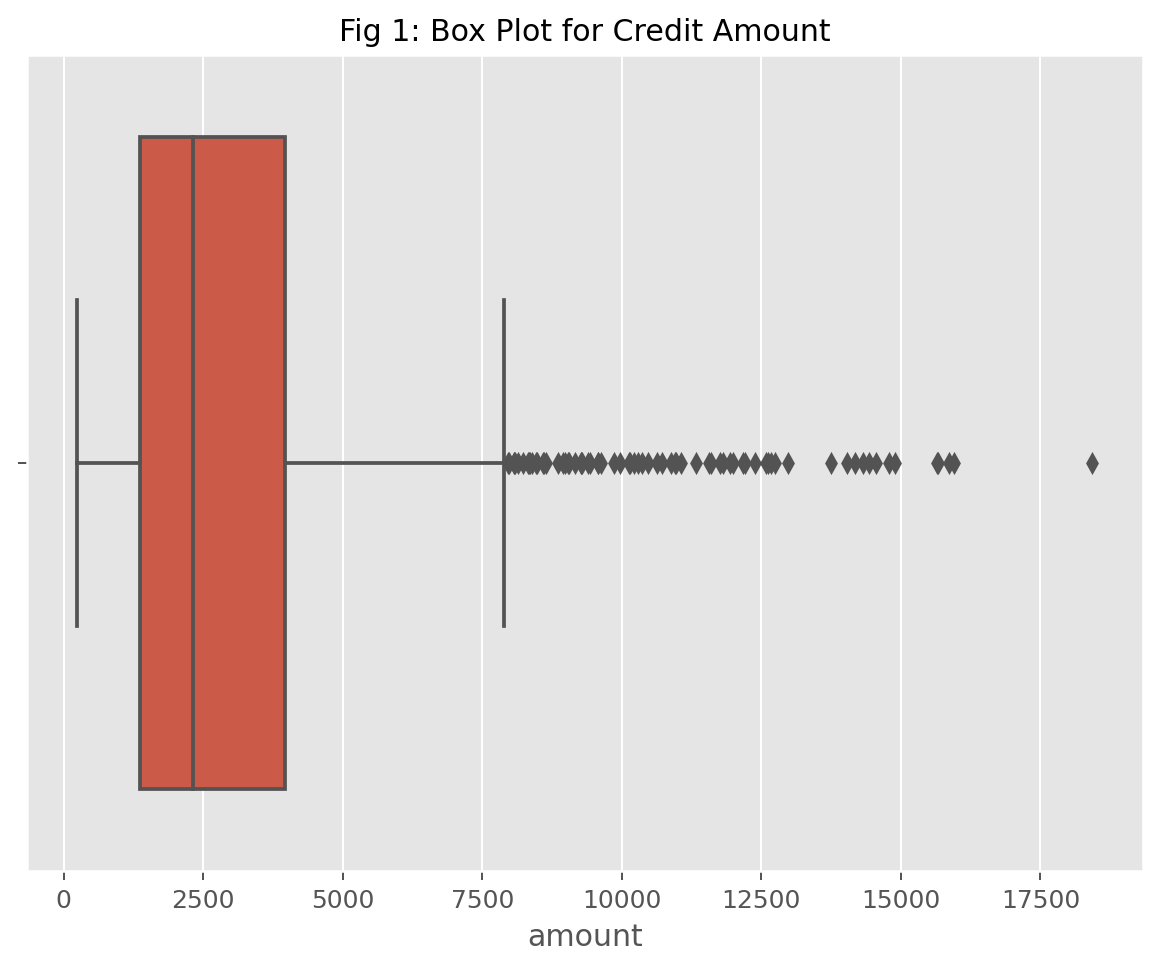

In [32]:
# box plot
sb.boxplot(summary_cred['amount']).set_title('Fig 1: Box Plot for Credit Amount', fontsize = 12);

From the bar chart above, we can observe that the mean credit amount lies closer to 2500 DM with the higher amounts (>7500 DM) being outliers.

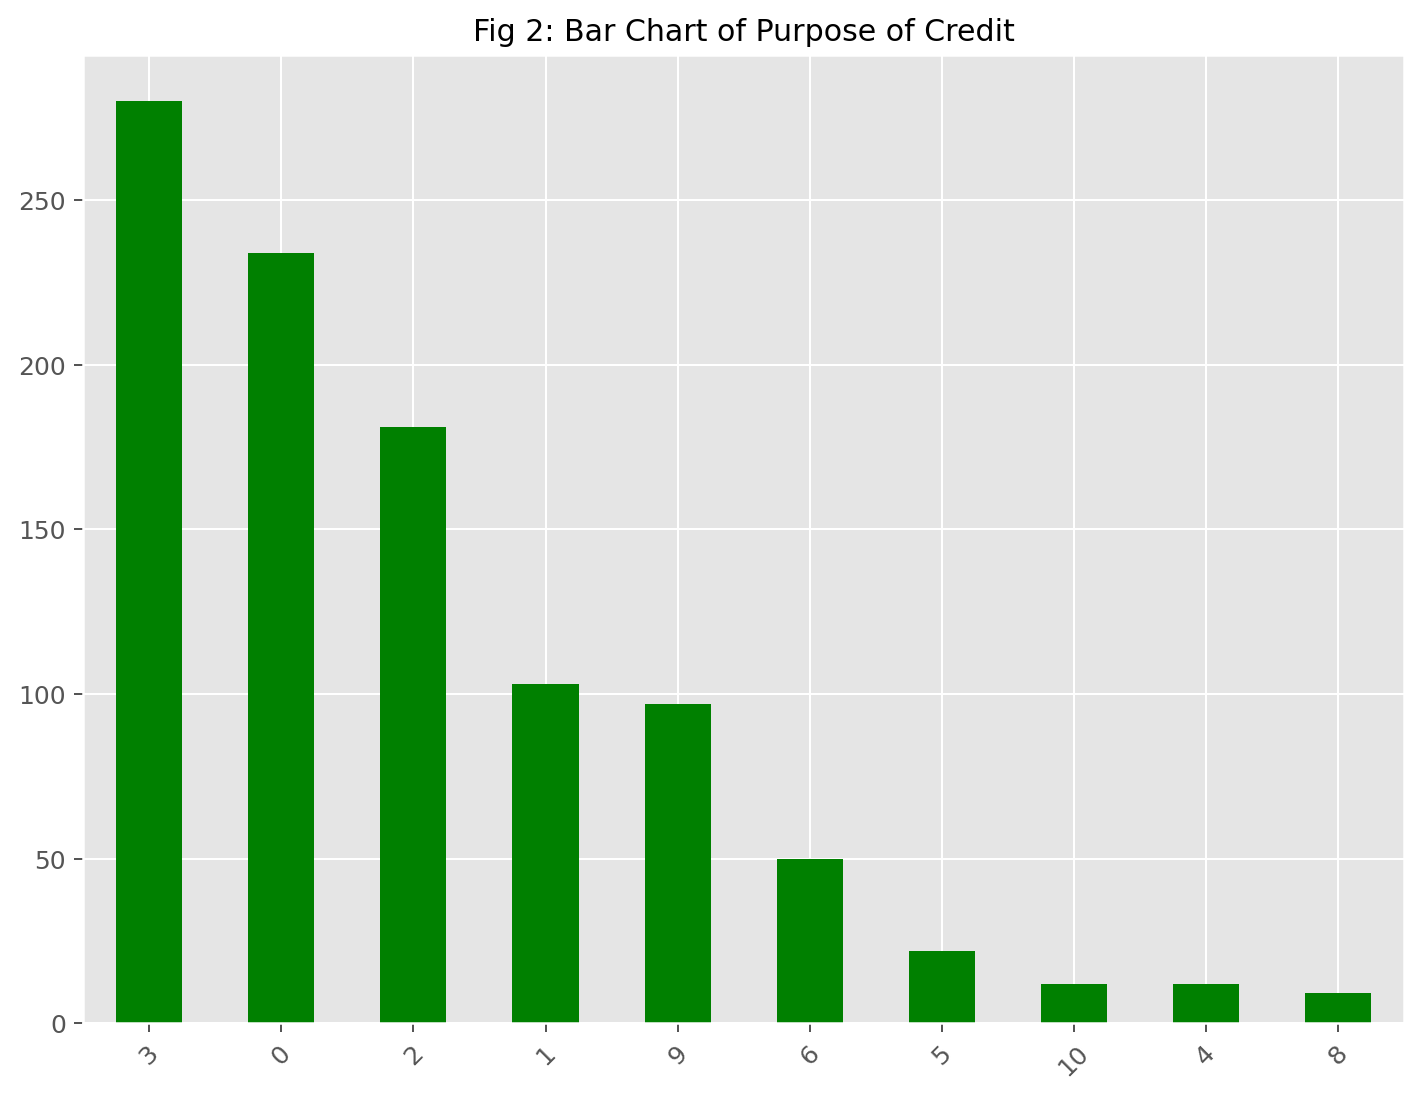

In [33]:
# bar chart
ax = summary_cred['purpose'].value_counts().plot(kind='bar',width=0.5,color = 'g')
ax.set_xticklabels(ax.get_xticklabels(),rotation = 45)
plt.tight_layout()
plt.title('Fig 2: Bar Chart of Purpose of Credit', fontsize = 12);

Here, we can observe that the highest number of individuals need credit for furniture/equipment, followed by others,used car and new car. Noticeably, the very small share of individuals need credit for the purpose of business, radio/TV and vacation.

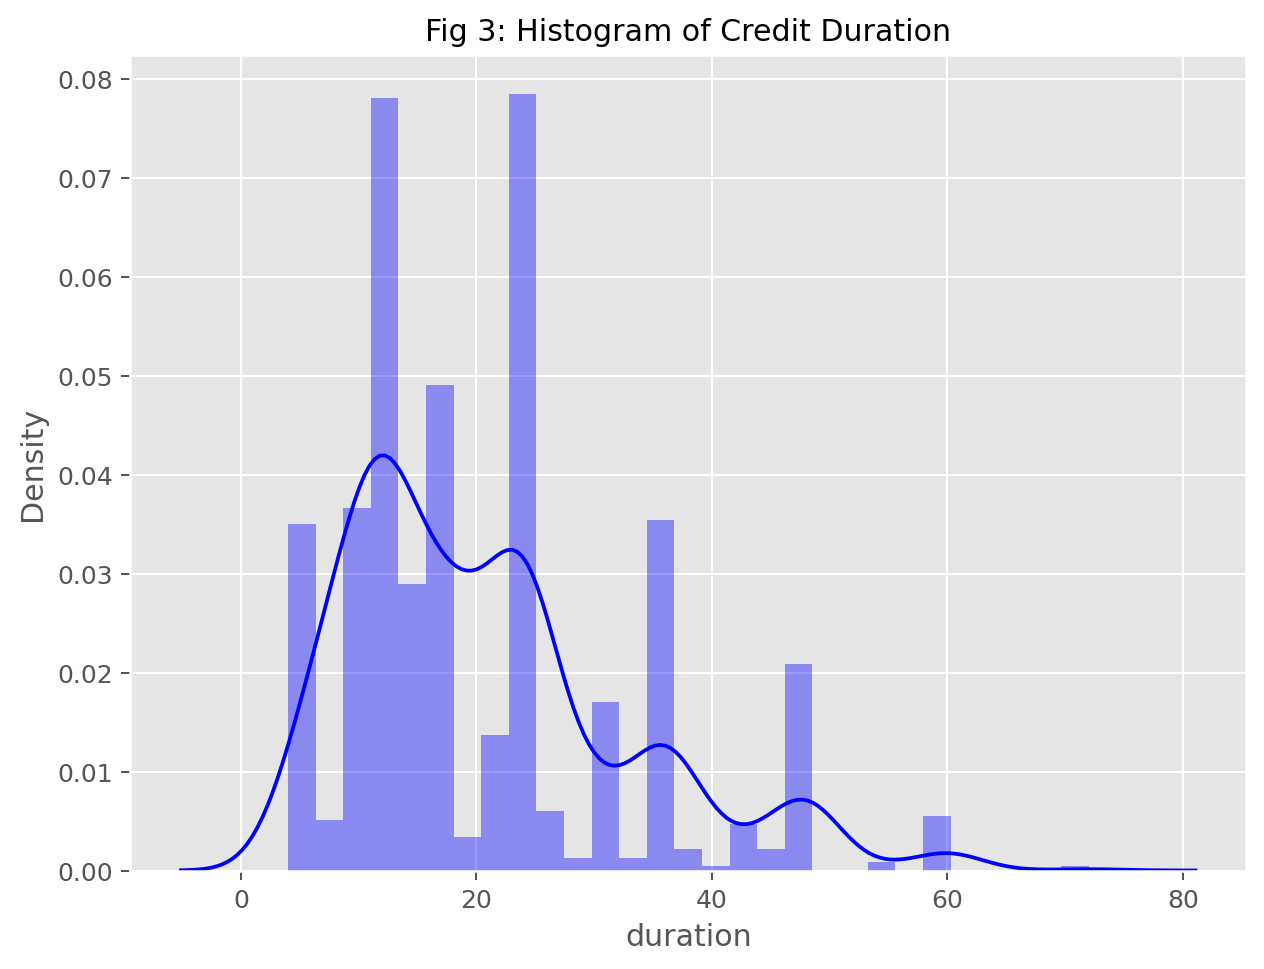

In [34]:
# histogram of duration with kernel density estimate
sb.distplot(summary_cred['duration'], kde = True, color = 'b').set_title('Fig 3: Histogram of Credit Duration', fontsize = 12);

From the above KDE-histogram plot, we can see that most individuals have approximately 10 - 25 months of credit duration. To note, there are very less debtors with credit duration of more than 40 months.

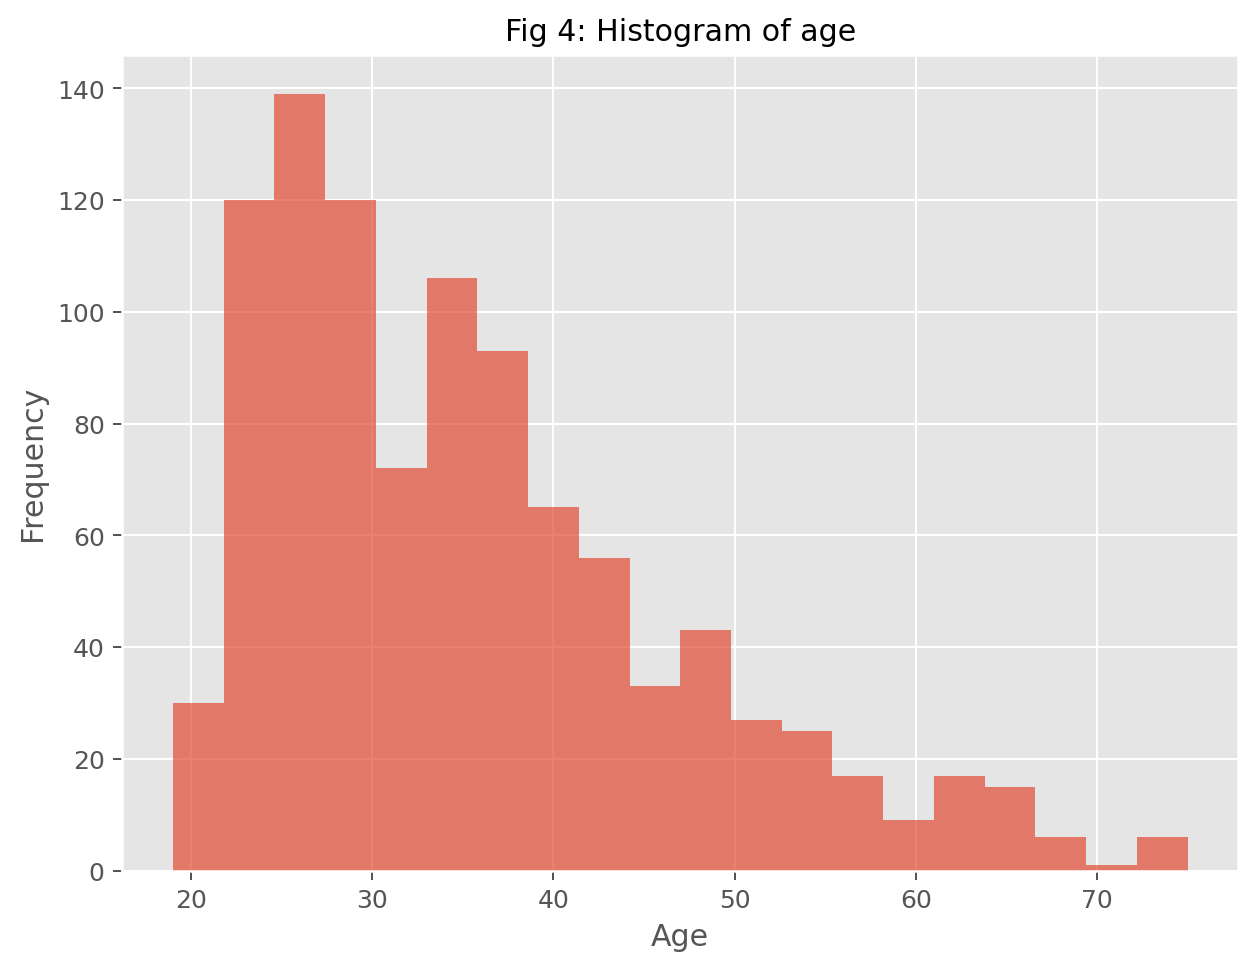

In [35]:
plt.hist(summary_cred['age'], bins=20, alpha=0.7)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Fig 4: Histogram of age', fontsize=12);

From the above histogram plot, we can observe that most of the individuals belong to the age group of 20-45 and the plot is right-skewed.

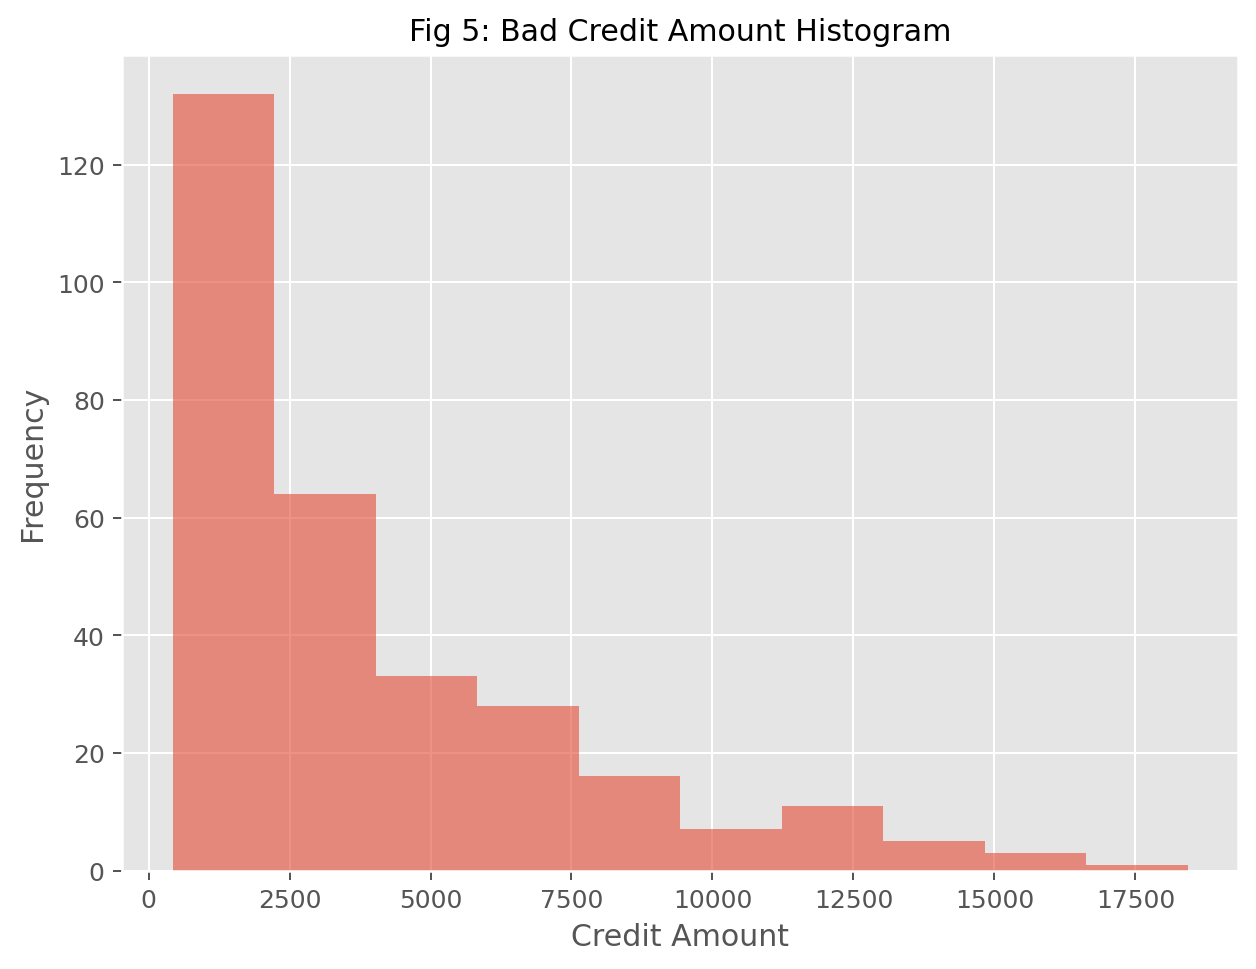

In [36]:
plt.hist(summary_cred[summary_cred['credit_risk']==0]['amount'],alpha=0.6)
plt.xlabel('Credit Amount')
plt.ylabel('Frequency')
plt.title('Fig 5: Bad Credit Amount Histogram', fontsize=12);

Following observations can be made from above plot :

* The bad credit histogram is right skewed and with maximum bad credits amounts under 7500 DM.

* Highest bad credit could be for the business purpose (can be checked in next section).

### Bivariate Plots

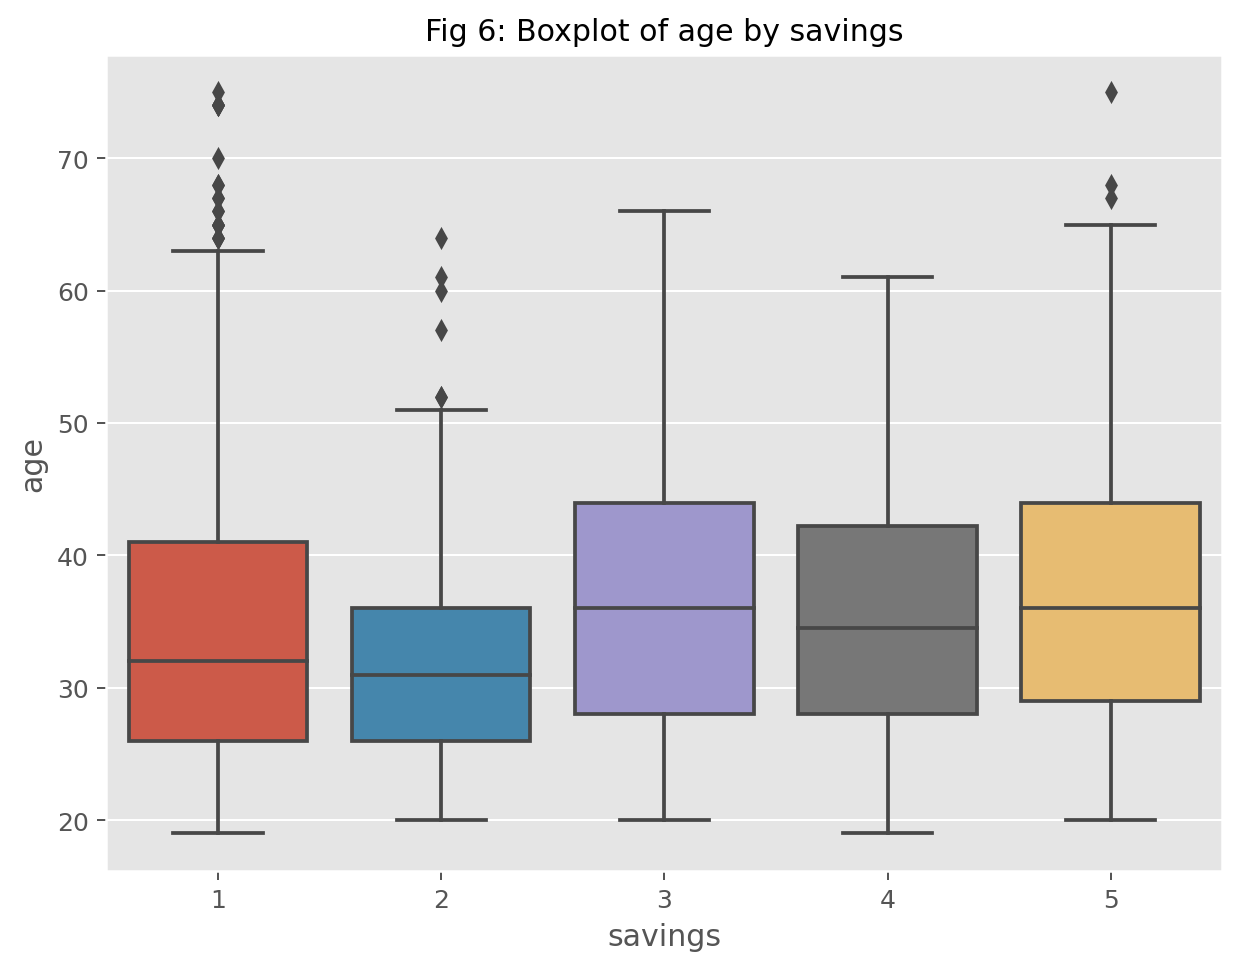

In [37]:
sb.boxplot(x='savings',y='age',data=summary_cred).set_title('Fig 6: Boxplot of age by savings', fontsize = 12);

From the above plot, we can say that the debtors with savings in the 100-500 DM and >1000 DM categories have higher median ages of approx 36. Debtors having savings of <100 DM have lowest median age of around 32.

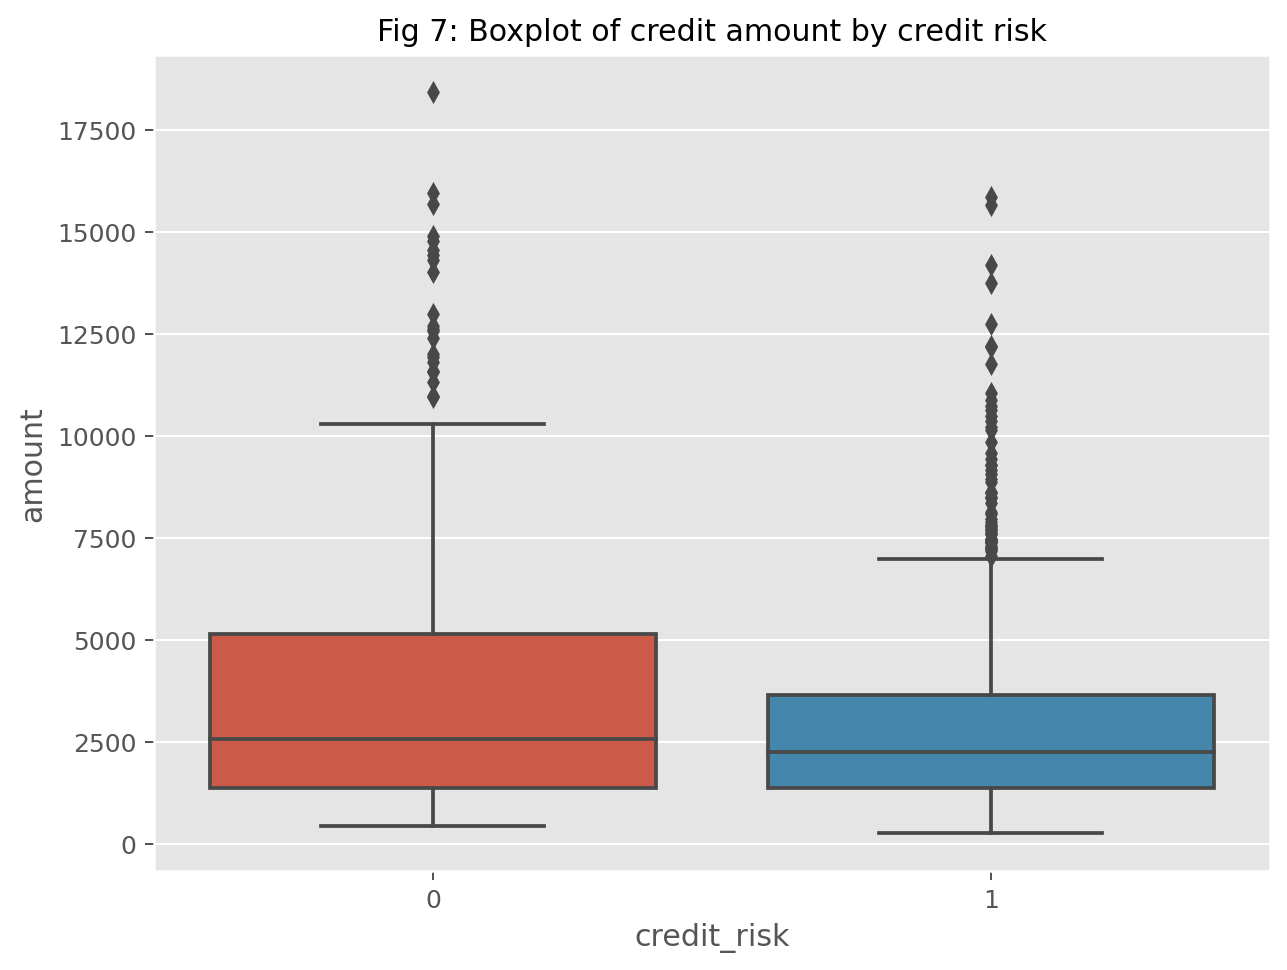

In [38]:
sb.boxplot(x='credit_risk', y='amount', data = summary_cred).set_title('Fig 7: Boxplot of credit amount by credit risk', fontsize = 12);

We can see that bad credit risk individuals has a slightly higher mean credit amount than those with good credit risk.

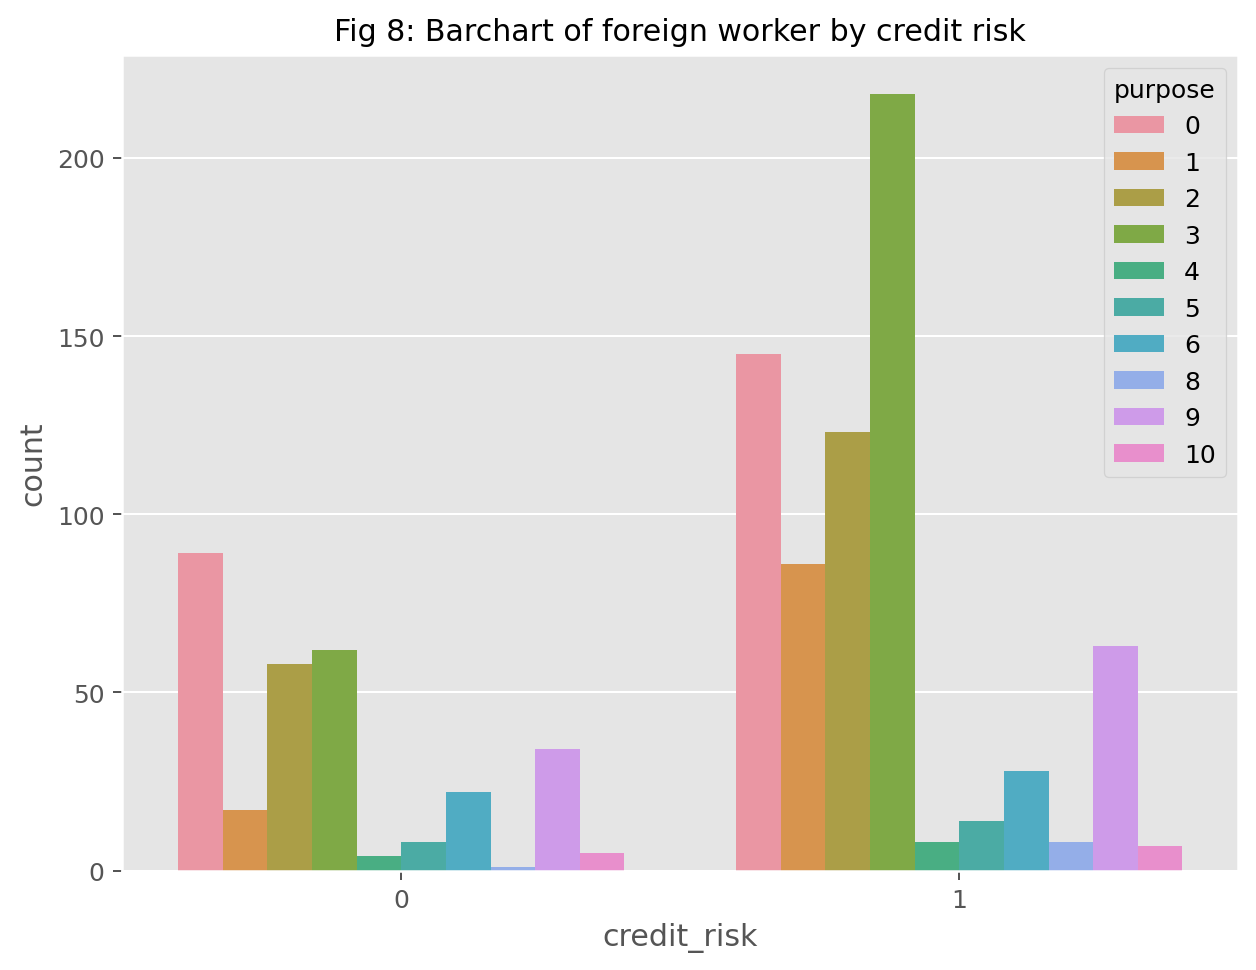

In [39]:
sb.countplot(x='credit_risk', hue='purpose', data=summary_cred).set_title('Fig 8: Barchart of foreign worker by credit risk', fontsize = 12);

It is evident from the above chart that while majority of individuals with good credit risks take loans for furniture/equipment, majority of the bad credit risk individuals take loans for other purposes like .

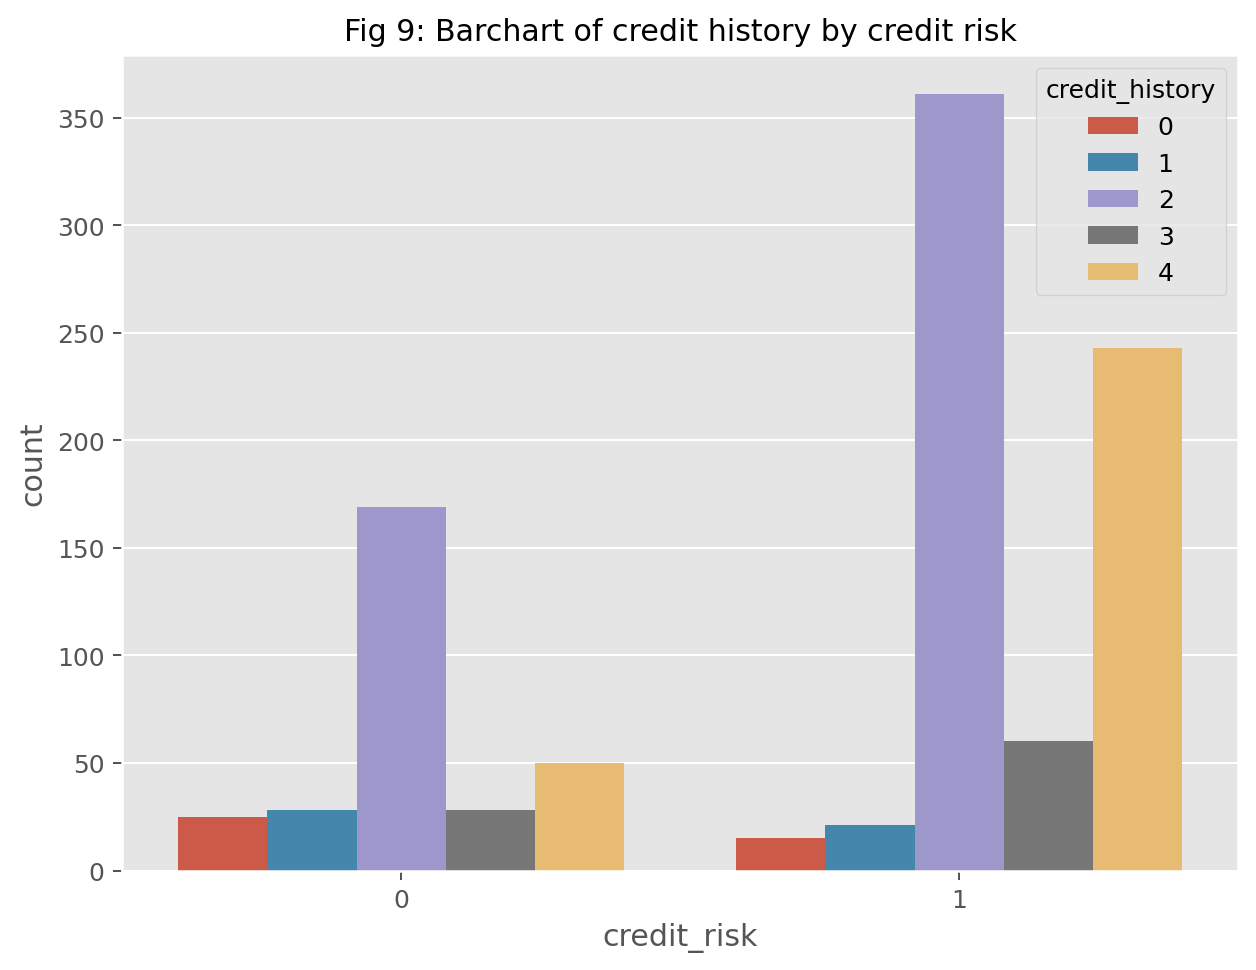

In [40]:
sb.countplot(x='credit_risk',hue='credit_history',data=summary_cred).set_title('Fig 9: Barchart of credit history by credit risk', fontsize = 12);

Notably enough, most of the good credit risk debtors had no history of credits taken or all their credits were paid back duly. A similar situation is seen among bad credit risk debtors as well.

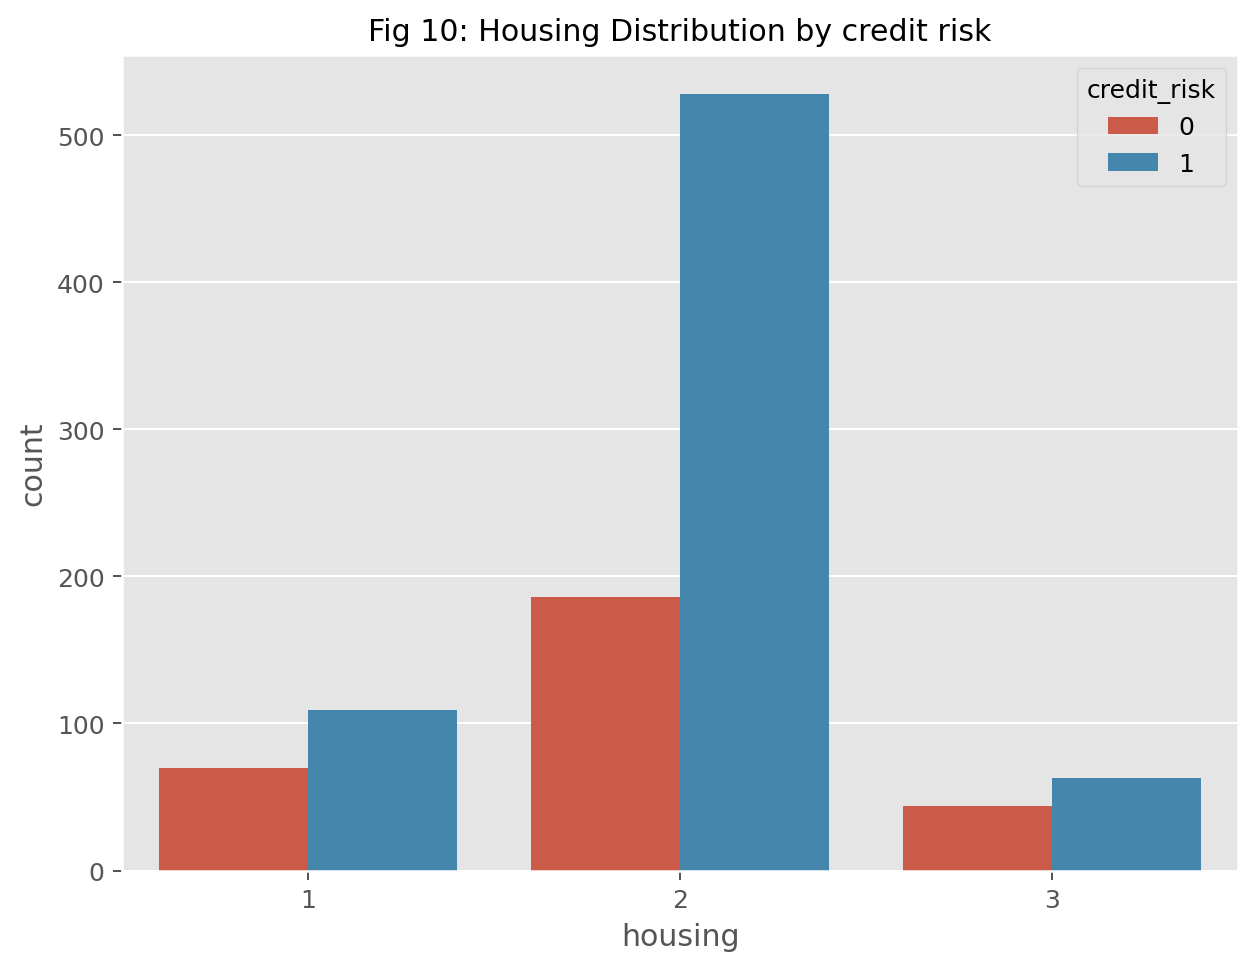

In [41]:
sb.countplot(x='housing',hue='credit_risk',data=summary_cred).set_title('Fig 10: Housing Distribution by credit risk', fontsize = 12);

We can see from the above plot that rental house and good credit risk have high correlation.

### Trivariate Plots

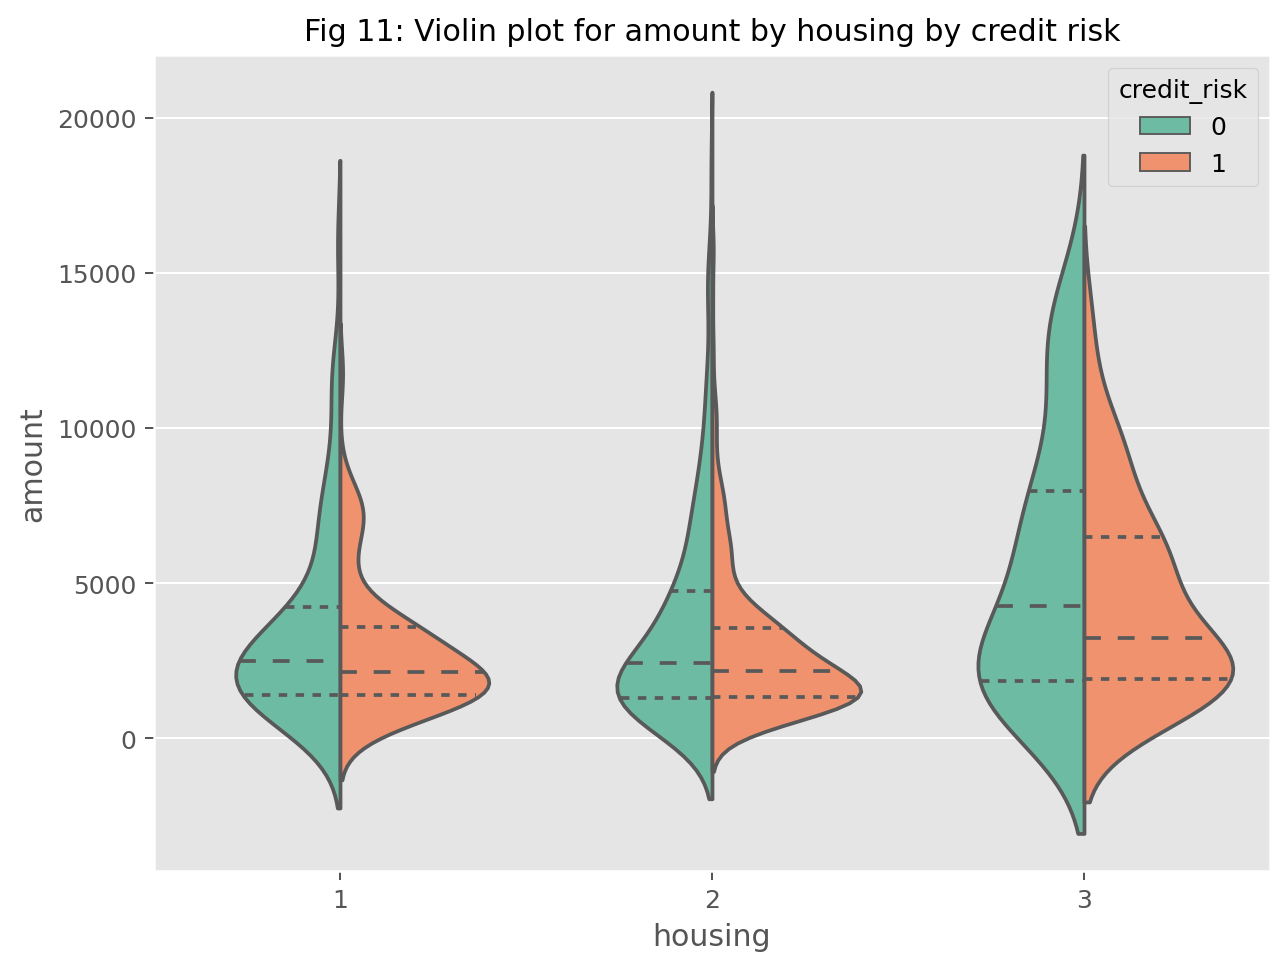

In [42]:
# violin plot
sb.violinplot(x = 'housing', y = 'amount', hue = 'credit_risk', 
              data = summary_cred, inner="quartile",
              split = True, saturation = 0.85, palette = "Set2").set_title('Fig 11: Violin plot for amount by housing by credit risk', fontsize = 12);

From the above violin plot, we can infer :

* Highest median credit amount comes from housing that is owned.

* Shapes of the distribution (extremely skinny on top end and wide in the middle) indicate that the credit amount for free and rented housing are highly concentrated around the median. Also there are more possibility of outliers for these two cases than those for own houses.

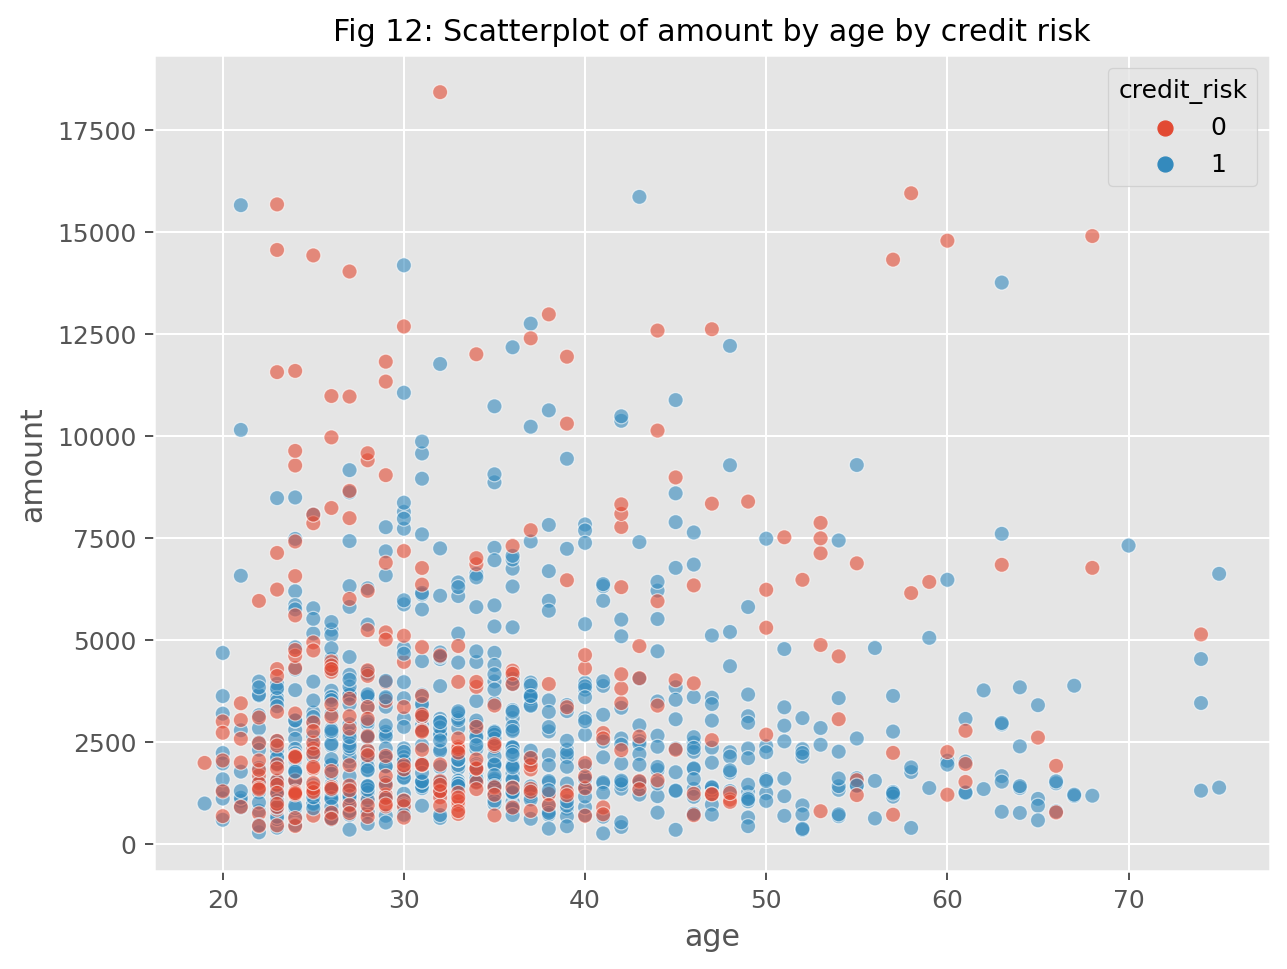

In [43]:
# scatter plot
sb.scatterplot(x ='age',
               y='amount',
               hue='credit_risk',
               data=summary_cred,
               alpha = 0.6).set_title('Fig 12: Scatterplot of amount by age by credit risk', fontsize = 12);

From the above scatter plot, we can infer :

* Amongst individuals having high credit amounts, younger debtors tend to have more bad credit risks.

* With increase in age (old and middle-aged), individuals tend to have more good credit risks than at a younger age.

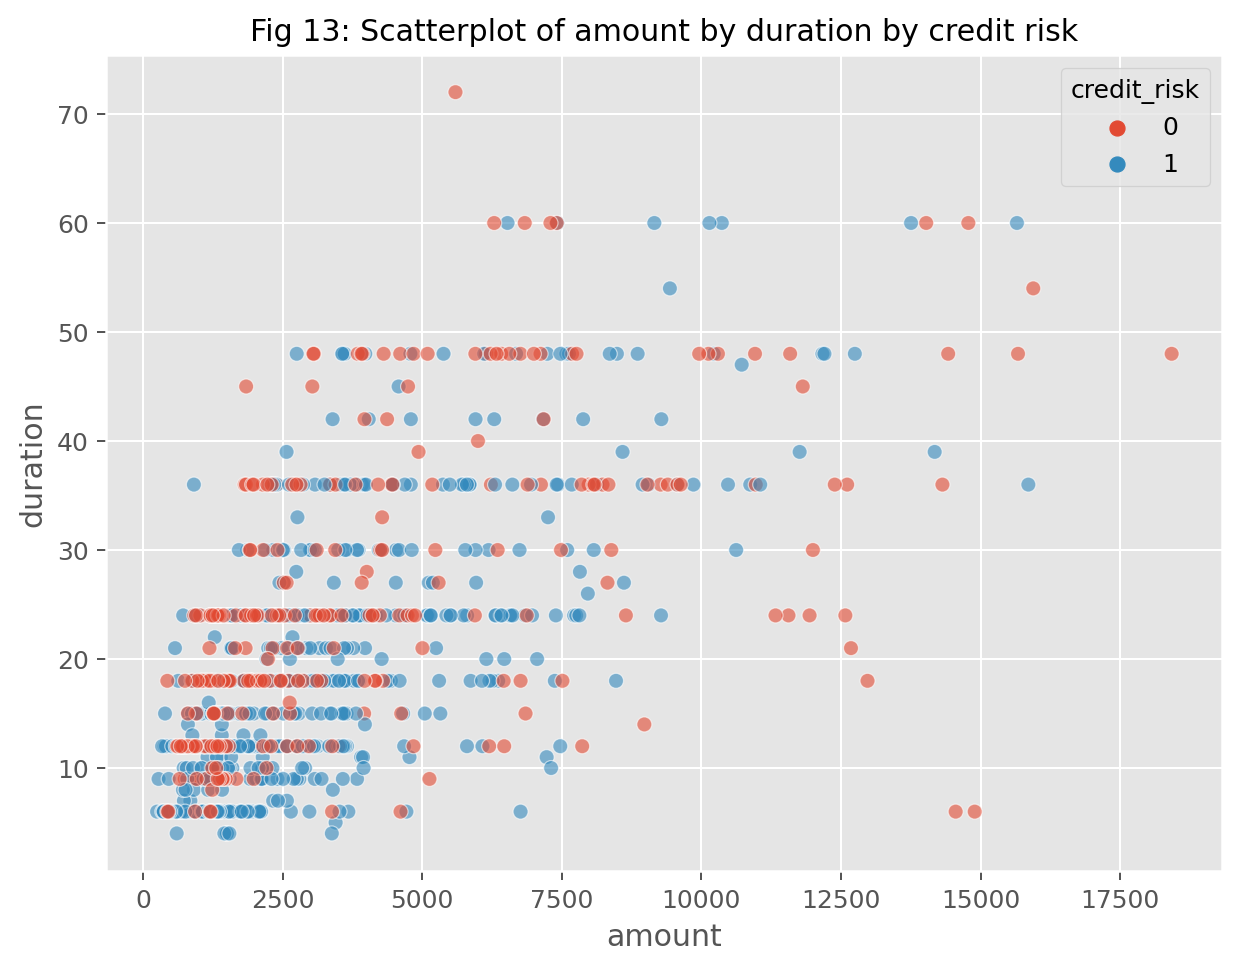

In [44]:
# scatter plot
sb.scatterplot(x = 'amount', 
               y = 'duration',
               hue = 'credit_risk',
               data = summary_cred,
               alpha = 0.6).set_title('Fig 13: Scatterplot of amount by duration by credit risk', fontsize = 12);

From the above scatter plot, we can infer :
    
* Individuals having shorter credit duration (<30 months) and low credit amounts (<2500 DM) tend to have more bad credit risks.
However, with increase in credit duration and amount, the no. of good credit risks increases.

* Interestingly, all those debtors who have very high credit amounts (>10000 DM) mostly have bad credit risks. Overall, good credit risks tend to favor those with lower credit amounts and average duration.

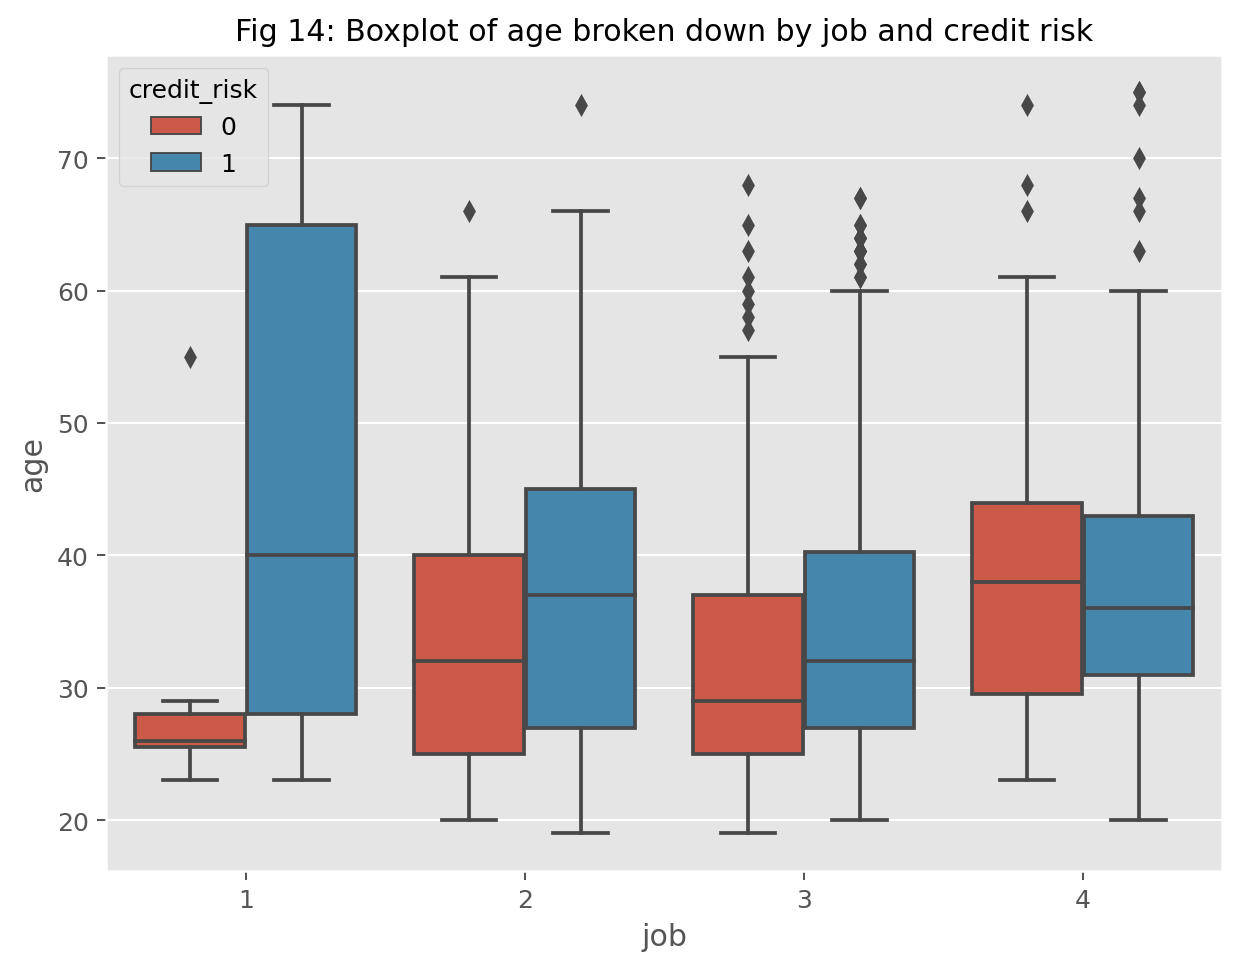

In [45]:
sb.boxplot(x = 'job',
           y = 'age',
           hue = 'credit_risk',
           data = summary_cred).set_title('Fig 14: Boxplot of age broken down by job and credit risk', fontsize = 12);

Following observations can be made from the above plot :

* Among unemployed/unskilled non-residents, there is a very low median age for bad credit risk. However, most of the individuals with good credit risks also belong to this unemployed/unskilled sector.

* Interestingly, among managers/self-employed/highly qualified employees, the median age for bad credit risk is higher. 

## Summary & Conclusions

1. All relevant and necessary data preprocessing and cleaning methods were applied to make the dataset ready for 
further predictive modeling in Phase 2.

2. Proper encoding of the categorical variables and dicretisation of numeric variables were performed.

3. Normalization was applied to the dataset to scale it with values between 0 and 1.

4. Datasets were split into `predictors_learn` and `target_learn` as `NumPy` arrays for feeding into `Scikit-Learn`.

5. Some of the important takeaways observed from relationships between the variables are:

>- Most individuals have approximately 10-25 months of credit duration and belong to the age group of 20-45.
>- Majority of individuals with good credit risks take loans for furniture/equipment, whereas most bad credit risk individuals take loans for business purpose.
>- Almost all debtors had no history of credits taken or all their credits were paid back duly.
>- Rental house and good credit risk have high correlation.
>- Younger individuals with high credit amounts have more bad credit risks. With increase in age, good credit risks increase.
>- Individuals having short credit duration (<30 months) and low credit amounts (<2500 DM) have more bad credit risks.
>- Good credit risks tend to favor those with lower credit amounts and average duration.
>- Majority of the good credit risk individual are unemployed/unskilled.

***

## References

<a id="1" href=#ref1>[1]</a> Babel, T. (2015). *Magnify*. [Dribbble] Available at: https://dribbble.com/shots/2172083-Magnify.

<a id="2" href=#ref2>[2]</a> Fahrmeir, L. and Hamerle, A. (1984, in German). *Multivariate Statistische Verfahren* (1st ed., Ch.8 and Appendix C). De Gruyter, Berlin.

<a id="3" href=#ref3>[3]</a> Grömping, U. (2019). *South German Credit Data: Correcting a Widely Used Data Set*. Report 4/2019, Reports in Mathematics, Physics and Chemistry, Department II, Beuth University of Applied Sciences Berlin. Available at: http://www1.beuth-hochschule.de/FB_II/reports/Report-2019-004.pdf. Dataset at: [URL](https://archive.ics.uci.edu/ml/datasets/South+German+Credit+%28UPDATE%29)

<a id="4" href=#ref4>[4]</a> Häuβler, W.M. (1979, in German). Empirische Ergebnisse zu Diskriminationsverfahren bei Kreditscoringsystemen. *Zeitschrift für Operations Research*, 23(8), pp.B191–B210. doi:10.1007/bf01917956.

<a id="5" href=#ref5>[5]</a> Open data LMU (2010, in German). *Kreditscoring zur Klassifikation von Kreditnehmern*. Available at: https://doi.org/10.5282/ubm/data.23.